<a href="https://www.kaggle.com/code/nikhilkhetan/tqdm-tutorial?scriptVersionId=98326953" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Think of the time when you were doing a computationaly intensive task like Data Scraping or tuning the hyperparameters of your model. Wouldn't it be great to have a tracker to show the progress of the entire process?

When dealing with large datasets or loops that take a while to process, it feels helpless to stare at the screen without any clue of how much longer the processing will take.

That's where tqdm comes in for rescue. In this notebook, we will see how to use tqdm in our processes, what all can be achieved using tqdm, it's advantages over other Progess bars, integration with Pandas, Keras & JupyterNotebooks and some use cases.

# Table of Contents

* Installation 
* Introduction
* Ways to use tqdm
* Customizing progress bar using tqdm parameters
* tqdm Use-case for Data Scraping
* tqdm Use-case for non-DS tasks
* Integration with popular libraries (Pandas, Keras)
* tqdm_notebook (IPython/Jupyter Integration)
* tqdm vs tqdm_notebook on Nested Loops
* tqdm - Comparision with other progress bars
* Acknowledgements
* Other Useful Links

# 1. Installation

### 1.1 Latest PyPI Stable release:

pip install tqdm

### 1.2 Latest development release on GitHub:

pip install "git+https://github.com/tqdm/tqdm.git@devel#egg=tqdm"

### 1.3 Other releases:

https://github.com/tqdm/tqdm#installation

# 2. Introduction

tqdm is a Python library which is used for creating a progress bar. It is typically used to display the progress of a lengthy operation and it provides a visual cue that processing is underway.

A tqdm progress bar gives information such as 

1. The Number and Percentage of iterations completed out of the total number of iterations
2. Total Elapsed Time
3. Estimated Time to Complete the loop, and 
4. The speed of the loop in iterations per second (or it/s).

#### An exampe of a tqdm progess bar

In [1]:
from tqdm import tqdm
for i in tqdm(range(10000000)):
    ...

100%|██████████| 10000000/10000000 [00:02<00:00, 4168586.74it/s]


# 3. Ways to use tqdm


There are multiple ways to use tqdm as shown below.

### 3.1 Iterable-based

In [2]:
from time import sleep

text = ""
for char in tqdm(["a", "b", "c", "d"]):
    sleep(0.25)
    text = text + char

100%|██████████| 4/4 [00:01<00:00,  3.98it/s]


### 3.2 Using trange

   trange is a special feature of tqdm that combines Python's in-built range function with tqdm

In [3]:
from tqdm import trange

for i in trange(100):
    sleep(0.01)

100%|██████████| 100/100 [00:01<00:00, 98.11it/s]


### 3.3 As a module with pipes

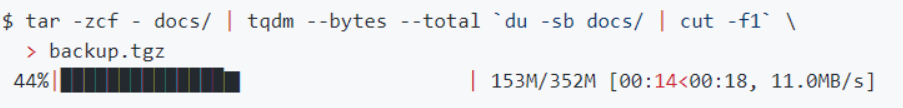

More examples for this usage are shown in section 7

### 3.4 Nested Progress bars

In [4]:
for i in trange(4, desc='1st loop'):
    for j in trange(5, desc='2nd loop'):
        for k in trange(10, desc='3rd loop', leave=False):
            sleep(0.01)

2nd loop:   0%|          | 0/5 [00:00<?, ?it/s]

3rd loop:   0%|          | 0/10 [00:00<?, ?it/s]

3rd loop: 100%|██████████| 10/10 [00:00<00:00, 98.96it/s]

                                                         
2nd loop:  20%|██        | 1/5 [00:00<00:00,  9.22it/s]

3rd loop:   0%|          | 0/10 [00:00<?, ?it/s]

3rd loop: 100%|██████████| 10/10 [00:00<00:00, 99.01it/s]

                                                         
2nd loop:  40%|████      | 2/5 [00:00<00:00,  9.07it/s]

3rd loop:   0%|          | 0/10 [00:00<?, ?it/s]

3rd loop: 100%|██████████| 10/10 [00:00<00:00, 99.04it/s]

                                                         
2nd loop:  60%|██████    | 3/5 [00:00<00:00,  9.02it/s]

3rd loop:   0%|          | 0/10 [00:00<?, ?it/s]

3rd loop: 100%|██████████| 10/10 [00:00<00:00, 98.98it/s]

                                                         
2nd loop:  80%|████████  | 4/5 [00:00<00:00,  9.04it/s]

3rd loop:   0%|          | 0/10 [00:00<?, ?it/s]

3rd l

#  4. Customizing progress bar using tqdm parameters

The notebook output will only show the final state of the progress bar and the intermediate states in case of dynamic customization will only show when executing the cells.

### 4.1.1 Set a description (prefix) to the progess bar in tqdm

In [5]:
for i in tqdm(range(9999999), desc="Progress"):
    pass

Progress: 100%|██████████| 9999999/9999999 [00:03<00:00, 3095644.49it/s]


### 4.1.2 Include variables to create a dynamic description

In [6]:
pbar = tqdm(["a", "b", "c", "d"])
for char in pbar:
    sleep(0.25)
    pbar.set_description("Processing %s" % char)

Processing d: 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]


### 4.2. Control the length of the progess bar by using 'ncols'. 

   This argument actually sets the width of the entire output message but this is achieved by dynamically resizing the progess bar first and then cropping other stats.

In [7]:
#No resizing
for i in tqdm(range(9999999)):
    pass

100%|██████████| 9999999/9999999 [00:02<00:00, 4890670.50it/s]


In [8]:
#Resizing to 55 columns; Progress bar is shortened
for i in tqdm(range(9999999), ncols=55):
    pass

100%|███| 9999999/9999999 [00:02<00:00, 4971935.11it/s]


In [9]:
#Further resizing; Time stats are taken out
for i in tqdm(range(9999999), ncols=20):
    pass

100%|█| 9999999/9999


In [10]:
#Progress is shown only as %
for i in tqdm(range(9999999), ncols=4):
    pass

100%


### 4.3 Use ASCII characters (123456789#) to fill the progress bar

In [11]:
for i in tqdm(range(9999999), ascii=True):
    pass

100%|##########| 9999999/9999999 [00:02<00:00, 4271012.68it/s]


### 4.4 Display progress updates after 'minintervals' seconds only

In [12]:
for i in tqdm(range(9999999), mininterval=0.5):
    pass

100%|██████████| 9999999/9999999 [00:02<00:00, 3936944.72it/s]


### 4.5 Display progress updates after 'miniters' iterations only

In [13]:
for i in tqdm(range(9999999), miniters=2000000):
    pass

100%|██████████| 9999999/9999999 [00:01<00:00, 5927129.54it/s]


### 4.6 Change the unit from it/s to anything you like

In [14]:
for i in tqdm(range(9999999), unit='loops'):
    pass

100%|██████████| 9999999/9999999 [00:01<00:00, 5102848.39loops/s]


### 4.7 Change the scale of the unit automatically to kilos, megas, etc. Changes units for both the records stats and the time stats. There are 2 ways to do this.

   #### 4.7.1 unit_scale=True

In [15]:
for i in tqdm(range(9999999), unit_scale=True):
    pass

100%|██████████| 10.0M/10.0M [00:04<00:00, 2.18Mit/s]


#### 4.7.2 unit_scale=1

In [16]:
for i in tqdm(range(9999999), unit_scale=1):
    pass

100%|██████████| 10.0M/10.0M [00:03<00:00, 3.13Mit/s]


### 4.8 Specify the unit divisor. Unlike unit_scale, this has no effect on time stats and only changes record stats

In [17]:
for i in tqdm(range(9999999), unit_scale=True, unit_divisor=100):
    pass

100%|██████████| 10.0G/10.0G [00:02<00:00, 4.07Mit/s]


### 4.9 Specify the colour for the progress bar

In [18]:
for i in tqdm(range(9999999), colour='green'):
    pass

100%|██████████| 9999999/9999999 [00:04<00:00, 2220349.90it/s]


# 5. tqdm Use-case for Data Scraping

This section discusses scenarios where you can use tqdm while scraping Data from the Internet. 

Please also refer to the "Additional Resources" section for a link to use tqdm to track the progress of an ML experiment.

### 5.1 Data Scraping

Google defines Data Scraping as "Data scraping, also known as web scraping, is the process of importing information from a website into a spreadsheet or local file saved on your computer. It's one of the most efficient ways to get data from the web, and in some cases to channel that data to another website."

It is the term used to describe the process of extracting information from a website such as Twitter, Reddit, etc. using an API. Most probably, it is what you will do if you ever try to create a Kaggle Dataset.

#### Below is a very simple example of scraping data from Twitter and using tqdm to track the progress.The code won't work here, so I have commented it. You can run it on a Jupyter notebook with your Twitter Developer Credentials.

I have included the tqdm progress bar that resulted when I ran this code on Jupyter and another one below it that resulted from a more intensive operation.

As you can see it took over an hour for the 2nd operation to reach 63% completion. Without tqdm it would be very frustrating to wait while this process executes.

In [19]:
# import tweepy as tw
# from tqdm import tqdm, notebook

# consumer_api_key = "CONSUMER_API_KEY"
# consumer_api_secret = "CONSUMER_API_SECRET"

# auth = tw.OAuthHandler(consumer_api_key, consumer_api_secret)
# api = tw.API(auth, wait_on_rate_limit=True)

# search_words = "#bitcoin -filter:retweets"
# date_since = "2020-03-01"
# # Collect tweets
# tweets = tw.Cursor(api.search,
#               q=search_words,
#               lang="en",
#               since=date_since).items(12452)

# tweets_copy = []
# for tweet in tqdm(tweets):
#      tweets_copy.append(tweet)

Progress bar from above code

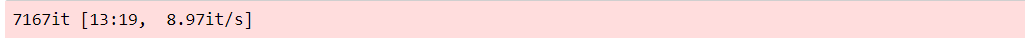

Progress bar from an Intensive operation

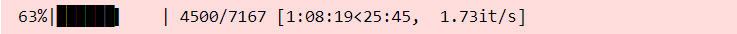

# 6. tqdm Use-case for non-DS tasks

This section discusses tqdm use-cases for non-Data Science tasks.

Snapshots for this section have been taken directly from the official documentation of tqdm.

### 6.1 Counting the number of lines in all Python files in the current directory, with timing information included

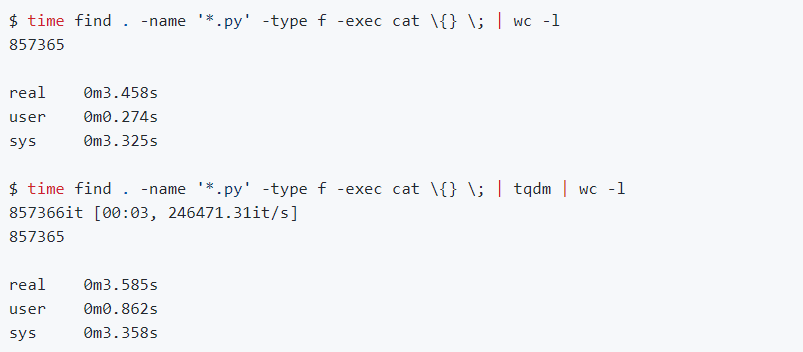

### Specifying arguments for tqdm

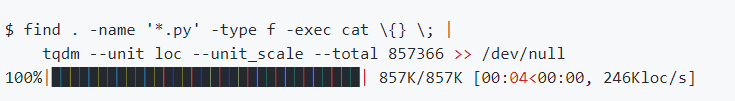

### 6.2 Backing up a large directory

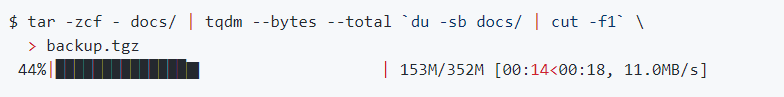

The above process with added details

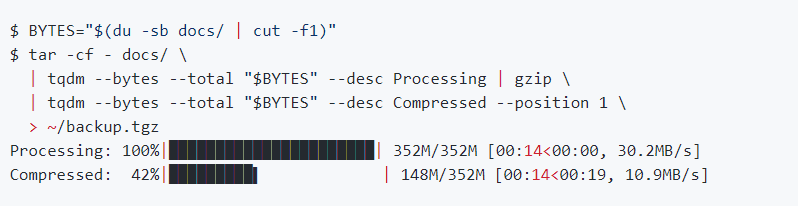

# 7. Integration with Popular libraries

### 7.1 Pandas Integration

In [20]:
import pandas as pd
import numpy as np
from tqdm import tqdm

df = pd.DataFrame(np.random.randint(0, 100, (100000, 6)))

tqdm.pandas(desc="my bar!")

Now you can use `progress_apply` instead of `apply` and `progress_map` instead of `map`

In [21]:
df.progress_apply(lambda x: x**2)

my bar!: 100%|██████████| 6/6 [00:00<00:00, 762.07it/s]


,0,1,2,3,4,5
0,100,576,2601,1089,1444,8649
1,1681,9604,529,3721,5776,4761
2,4,3721,2704,529,1296,25
3,2916,7569,7396,1296,4900,6084
4,225,1225,49,361,784,6400
...,...,...,...,...,...,...
99995,3025,144,3721,324,729,2025
99996,3600,1296,5184,7921,6400,8281
99997,6084,3249,841,6084,6084,676
99998,5476,225,4624,9216,8836,2025


You can also groupby:

In [22]:
df.groupby(0).progress_apply(lambda x: x**2)

my bar!: 100%|██████████| 100/100 [00:00<00:00, 1732.44it/s]


,0,1,2,3,4,5
0,100,576,2601,1089,1444,8649
1,1681,9604,529,3721,5776,4761
2,4,3721,2704,529,1296,25
3,2916,7569,7396,1296,4900,6084
4,225,1225,49,361,784,6400
...,...,...,...,...,...,...
99995,3025,144,3721,324,729,2025
99996,3600,1296,5184,7921,6400,8281
99997,6084,3249,841,6084,6084,676
99998,5476,225,4624,9216,8836,2025


### 7.2 Keras Integration

Keras Callback is available with tqdm

In [23]:
from tqdm.keras import TqdmCallback

...

# model.fit(..., verbose=0, callbacks=[TqdmCallback()])

2022-06-14 09:37:18.239950: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-06-14 09:37:18.240030: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Ellipsis

The keras callback has a display() method which can be used with tqdm

In [24]:
from tqdm.keras import TqdmCallback
cbk = TqdmCallback(display=False)

# 8. tqdm_notebook (IPython/Jupyter Integration)

The codes for this section won't work on Kaggle notebooks. I have included screenshots from the results obtained on Jupyter notebooks.

tqdm has a submodule **"tqdm_notebook"** for IPython/Jupyter Integration. 
The submodule provides a native Jupyter widget (compatible with IPython v1-v4 and Jupyter), fully working nested bars and colour hints (blue: normal, green: completed, red: error/interrupt, light blue: no ETA); as demonstrated below.

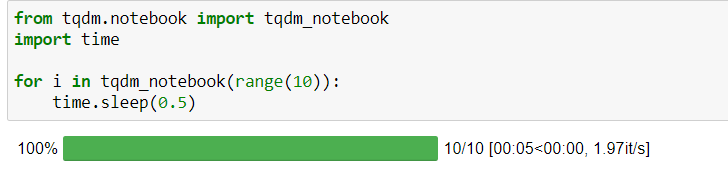

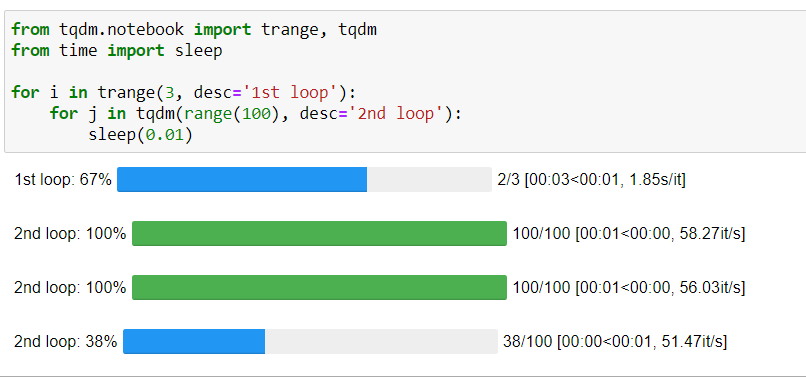

### the 'leave' (=False) argument removes the progress bar after the operation is completed

In the 1st image, the progress bar for the 1st iteration of the 2nd loop has been removed.

In the 2nd image, the progress bar for the 2nd loop has been removed completely after the entire operation ends.

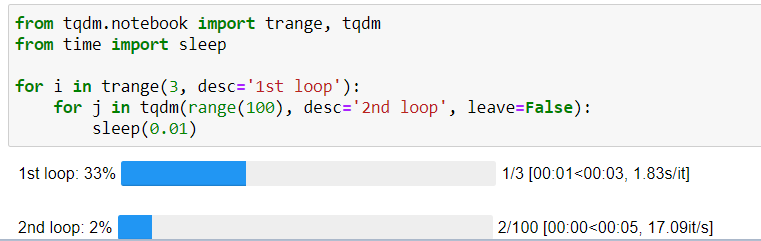

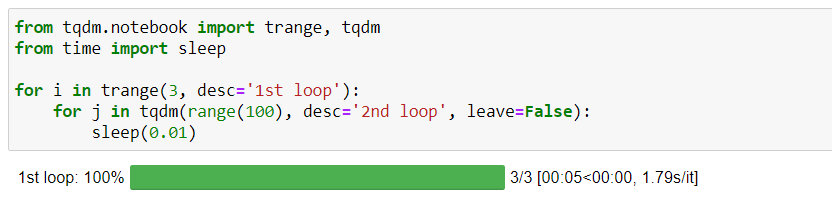

### Red bar when process is interuppted

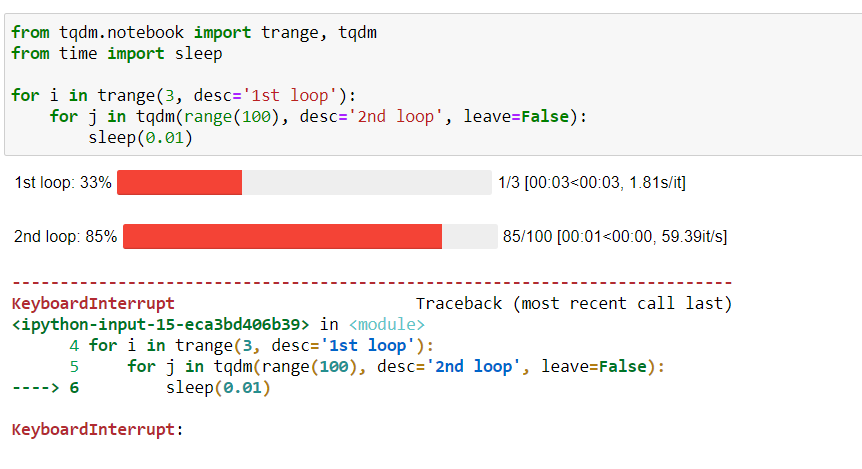

### Only the iteration which was interuppted will be red, any iteration that completed successfully will be in green

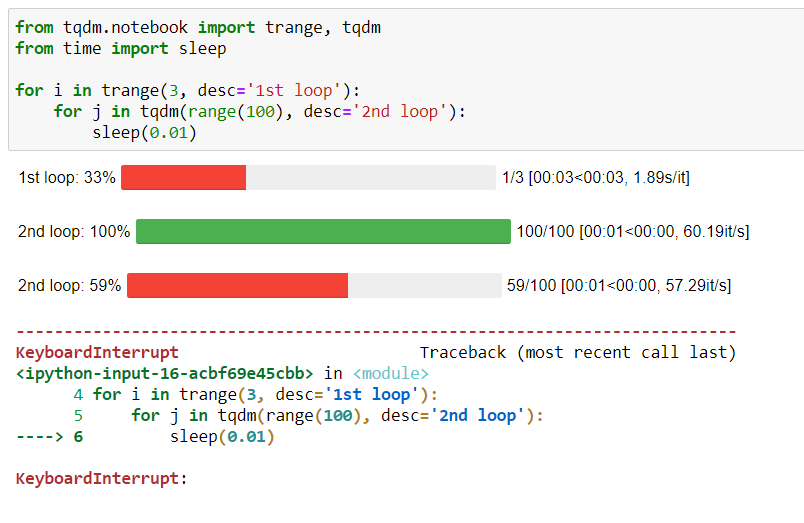

# 9. tqdm vs tqdm_notebook on Nested Loops

Running tqdm on Nested Loops

In [25]:
for i in tqdm(range(2), desc = 'Loop 1'):
    for j in tqdm(range(20,25), desc = 'Loop 2'):
        sleep(0.5)



Loop 1:   0%|          | 0/2 [00:00<?, ?it/s]


Loop 2:   0%|          | 0/5 [00:00<?, ?it/s]


Loop 2:  20%|██        | 1/5 [00:00<00:02,  2.00it/s]


Loop 2:  40%|████      | 2/5 [00:01<00:01,  1.99it/s]


Loop 2:  60%|██████    | 3/5 [00:01<00:01,  1.99it/s]


Loop 2:  80%|████████  | 4/5 [00:02<00:00,  1.99it/s]


Loop 2: 100%|██████████| 5/5 [00:02<00:00,  1.99it/s]


Loop 1:  50%|█████     | 1/2 [00:02<00:02,  2.52s/it]


Loop 2:   0%|          | 0/5 [00:00<?, ?it/s]


Loop 2:  20%|██        | 1/5 [00:00<00:02,  2.00it/s]


Loop 2:  40%|████      | 2/5 [00:01<00:01,  1.99it/s]


Loop 2:  60%|██████    | 3/5 [00:01<00:01,  1.99it/s]


Loop 2:  80%|████████  | 4/5 [00:02<00:00,  1.99it/s]


Loop 2: 100%|██████████| 5/5 [00:02<00:00,  1.99it/s]


Loop 1: 100%|██████████| 2/2 [00:05<00:00,  2.52s/it]


Running tqdm_notebook on Nested Loops

In [26]:
from tqdm import tqdm_notebook
for i in tqdm_notebook(range(2), desc = 'Loop 1'):
    for j in tqdm_notebook(range(20,25), desc = 'Loop 2'):
        sleep(0.5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Loop 1:   0%|          | 0/2 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


Loop 2:   0%|          | 0/5 [00:00<?, ?it/s]

Loop 2:   0%|          | 0/5 [00:00<?, ?it/s]

tqdm shows one progress bar for each iteration of the inner as well as the outer loop whereas tqdm_notebook shows one progress bar for outer loop and one progress bar for the inner loop for each iteration of the outer loop.

tqdm_notebook is more succinct than tqdm in case of Nested Loops.

# 10. tqdm - Comparision with other progress bars (ProgressBar, ProgressBar2 or Python ProgressBar, AliveProgress)

### Advantages of tqdm

* Overhead is low, about 60ns per iteration. By comparison, the well-established Python ProgressBar has an 800ns/iter overhead.
* tqdm uses smart algorithms to predict the remaining time and to skip unnecessary iteration displays, which allows for a negligible overhead in most cases.
* tqdm works on any platform (Linux, Windows, Mac, FreeBSD, NetBSD, Solaris/SunOS), in any console or in a GUI, and also integrates seamlessly with IPython/Jupyter notebooks.
* tqdm does not require any dependencies (not even curses!), just Python and an environment supporting carriage return '\r' and line feed '\n' control characters.

### Comparision with others

* ProgressBar becomes very messy if there is a print statement within the Iterable. This is better handled in ProgressBar2.
* AliveProgress has some really cool features that come in handy for animations and making progress bars look interactive.
* tqdm is a speedy and powerful progress bar. It provides a fast framework with a lot of customization and information and is extremely easy to set up. It also has the lowest overhead out of all the 4 libraries. Unless your project requires a lot of animation, tqdm would be the best option for implementing a progress bar.

tqdm has a lot more functionalities than what has been covered here. I have curated a list of the most frequently used operations and use-cases in this notebook and included few links below to build on top of it.

I will be more than happy to answer any queries that you have on this topic. With this I conclude my first Notebook/Tutorial on Kaggle. Hope you find it helpful. Thanks and to many more!!!

# 11. Acknowledgements

* [Official tqdm Documentation](https://tqdm.github.io/)
* [tqdm GitHub](https://github.com/tqdm/tqdm)
* [A complete guide to using Progress bars in python](https://towardsdatascience.com/a-complete-guide-to-using-progress-bars-in-python-aa7f4130cda8)
* [How to use progress bars in python](https://www.analyticsvidhya.com/blog/2021/05/how-to-use-progress-bars-in-python/)
* [Tweeter Data Scrapping Script](https://github.com/gabrielpreda/covid-19-tweets)

# 12. Additional Resources

* [Training an ML Model with a tqdm progress bar](https://towardsdatascience.com/training-models-with-a-progress-a-bar-2b664de3e13e)
* [tqdm WIKI](https://github.com/tqdm/tqdm/wiki)
* [How to make a great Progress bar](https://github.com/tqdm/tqdm/wiki/How-to-make-a-great-Progress-Bar)
* [Progress bars for Python with tqdm](https://towardsdatascience.com/progress-bars-for-python-with-tqdm-4dba0d4cb4c)
* [How to make a terminal progress bar using tqdm](https://www.geeksforgeeks.org/python-how-to-make-a-terminal-progress-bar-using-tqdm/)
* [Python Progress Bar](https://github.com/niltonvolpato/python-progressbar)

#### Useful Links for Data Scraping from Twitter

* [Twitter API v2](https://developer.twitter.com/en/docs/tutorials/explore-a-users-tweets)
* [Find all tweets from a user](https://stackoverflow.com/questions/8471489/find-all-tweets-from-a-user-not-just-the-first-3-200)
* [Script to download all of a user's tweets](https://gist.github.com/yanofsky/5436496)